In [2]:
import numpy as np
import matplotlib
import numpy.ma as ma
import vtk
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from preprocess import dcm2npMatrix, histeq, max_min_normal, make_dcm_data_set
import matplotlib.pyplot as plt
import cv2
import skimage.filters as filters
import math
import gbseg
import imp

In [61]:
%ls


data/           dcms/     linear_seg.py       preprocess.py  Untitled.ipynb
dataG.tar*      GbSeg.py  make_train_data.py  __pycache__/
dataHandler.py  LICENSE   pegbis/             seg1.ipynb


In [605]:
dcmPath = "./dcms/test/00000300.dcm"
x = dcm2npMatrix(dcmPath)

In [3]:
max_min(x)

NameError: name 'max_min' is not defined

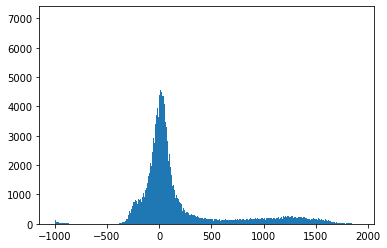

In [546]:
plt.hist(x.flatten(), bins=500)
plt.show()

using_max_min normal


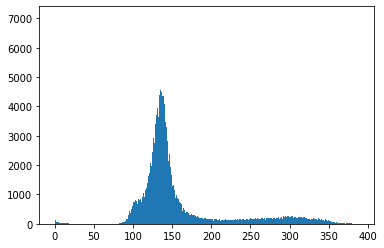

In [547]:
plt.hist(max_min_normal(x).flatten(), bins=500)
plt.show()

using_max_min normal


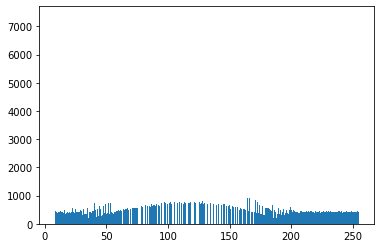

In [67]:
plt.hist(histeq(max_min_normal(x)).flatten(), bins=500)
plt.show()

using_max_min normal


/home/zhenxingxu/code/tc/preprocess.py:160: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  imhist, bins = np.histogram(im.flatten(), nbr_bins, normed=True)


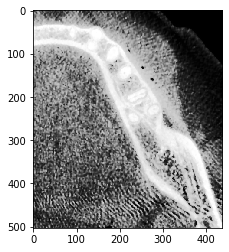

In [548]:
plotImage(histeq(max_min_normal(x)))

In [84]:
OTSU_enhance(x)

252

using_max_min normal


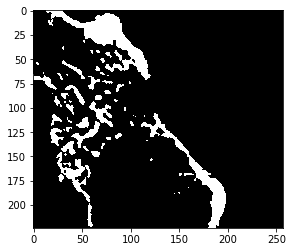

In [83]:
plotImage(max_min_normal(x)>OTSU_enhance(x))

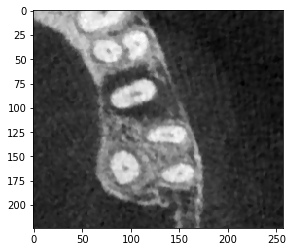

In [41]:
plotImage(x)

In [281]:
gkX = filters.gabor_kernel(theta=0, frequency=0.01)
gkY = filters.gabor_kernel(theta=math.pi/4, frequency=0.01)

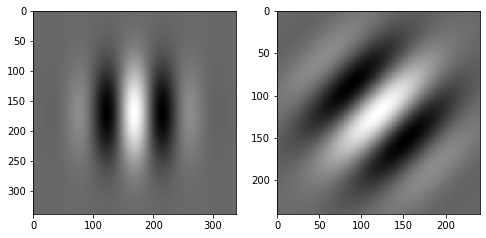

In [282]:
plt.figure('median',figsize=(8,8))
plt.subplot(121)
plt.imshow(gkX.real,plt.cm.gray) 
plt.subplot(122)
plt.imshow(gkY.real,plt.cm.gray) 

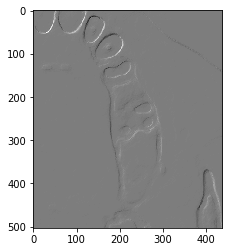

In [283]:
gaborImage1, gaborImage1R = filters.gabor(edges2, frequency= 0.8, theta=math.pi/1.2)
plt.imshow(gaborImage1R,plt.cm.gray)

In [272]:
gaborImage1R

array([[ 0,  0,  1, ...,  0,  0,  0],
       [ 0,  1,  1, ...,  0,  0,  0],
       [ 1,  2,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 23,  7, -2],
       [ 0,  0,  0, ..., 17, 10, -2],
       [ 0,  0,  0, ..., 13, 19,  9]], dtype=int16)

In [273]:
ee = filters.sobel(gaborImage1R)

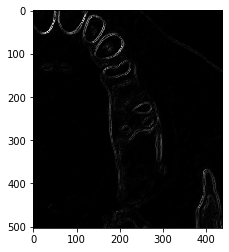

In [274]:
plt.imshow(ee ,plt.cm.gray)

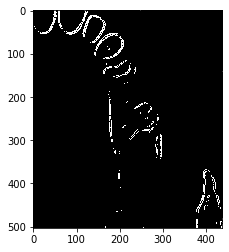

In [275]:
plt.imshow(ee > filters.threshold_isodata(ee),plt.cm.gray)

In [276]:
z = filters.sobel(gaborImage1R)

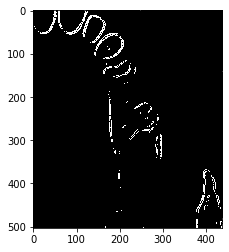

In [278]:
plt.imshow(z > filters.threshold_isodata(z),plt.cm.gray)

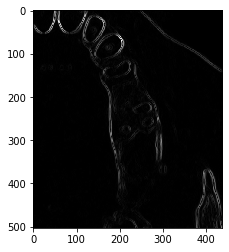

In [174]:
plt.imshow(filters.sobel(gaborImage1R),plt.cm.gray)

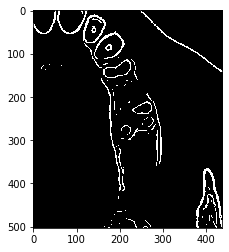

In [200]:
zzz = filters.sobel(edges1)
plt.imshow(zzz > filters.threshold_isodata (zzz),plt.cm.gray)

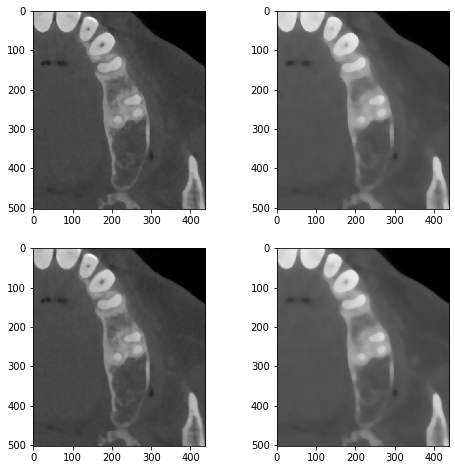

In [135]:
edges1 = filters.median(x,disk(5))
edges2= filters.median(x,disk(9))
gaussEdge1 = filters.gaussian(edges1, 1)
guassEdge2 = filters.gaussian(edges2, 1)

gkX = filters.gabor_kernel(theta=0, frequency=0.1)
gkY = filters.gabor_kernel(theta=math.pi/4, frequency=0.1)
ges1 = filters.median(x,disk(5)
plt.figure('median',figsize=(8,8))
plt.subplot(221)ges1 = filters.median(x,disk(5)
plt.imshow(edges1,plt.cm.gray) 
plt.subplot(222)
plt.imshow(edges2,plt.cm.gray)
plt.subplot(223)
plt.imshow(gaussEdge1,plt.cm.gray)
plt.subplot(224)
plt.imshow(guassEdge2,plt.cm.gray)
plt.show()

In [635]:
[x for x in np.linspace(0,np.pi,9)]

[0.0,
 0.39269908169872414,
 0.7853981633974483,
 1.1780972450961724,
 1.5707963267948966,
 1.9634954084936207,
 2.356194490192345,
 2.748893571891069,
 3.141592653589793]

In [36]:
%matplotlib inline

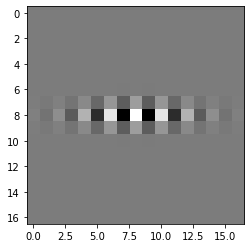

In [402]:
ksize = (17,17)
sigma = 3
theta = 0
waveLen = 2
gamma = 5
psi = 0

gk = cv2.getGaborKernel(ksize, sigma, theta, waveLen, gamma, psi)
plt.imshow(gk, cmap=plt.cm.gray)
plt.show()

In [289]:
gkFFt = cv2.dft(gk,flags=cv2.DFT_COMPLEX_OUTPUT)

In [290]:
gkFFt.shape

(17, 17, 2)

In [291]:
gkp = np.sum(np.power(gkFFt,2),axis=2)

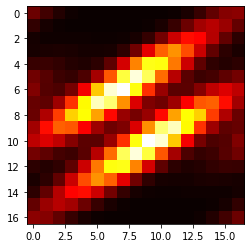

In [292]:
%matplotlib inline
plt.imshow(np.fft.fftshift(gkp), cmap=plt.cm.hot)

In [159]:
normalX = max_min_normal(x)

using_max_min normal


In [198]:
dst = cv2.filter2D(normalX, -1, gk)

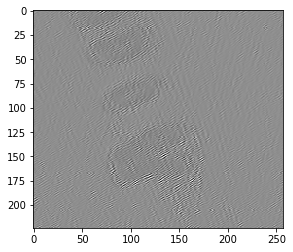

In [199]:
plotImage(dst)

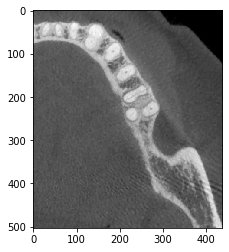

In [1747]:
plotImage(normalX.astype(np.int32))

In [38]:
max_min(z)

NameError: name 'z' is not defined

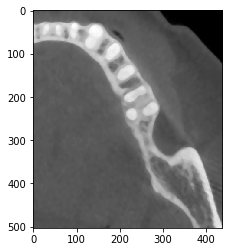

In [1746]:
z = normalX.astype(np.uint8)
plotImage(cv2.medianBlur(z, 9))

In [1527]:
def build_filters():
    filters = []
    ksize = [7]
    sigma = [5]
    waveLen = [3,4,5] 
    #waveLen = [x for x in np.linspace(0,9,9)]
    theta = [x for x in np.linspace(0,np.pi,9)]
    #gamma = [7]
    gamma = [7]
    psi = [0]
    #psi = [np.pi/2]
    for ks in ksize:
        for si in sigma:
            for wavel in waveLen:
                for ga in gamma:
                    for p in psi:
                        for th in theta:
                            kern = cv2.getGaborKernel((ks,ks), si, th, wavel, ga, p)
                            filters.append(kern)
    return filters


def process(img, filters):
    accum = np.zeros_like(img)
    imgs = []
    for k in filters:
        fimg = cv2.filter2D(img, -1, k)
        imgs.append(fimg)
        #accum = np.maximum(accum, fimg)
        accum = np.maximum(accum, np.abs(fimg))
        #accum += np.abs(fimg)
    
    #return accum/len(filters), imgs
    return accum, imgs

def plotImage(src):
    plt.imshow(src, cmap='gray')
def max_min(img):
    ma = np.max(img)
    mi = np.min(img)
    print("Max:{}. Min:{}".format(ma, mi))
def fft(img):
    imgfft = cv2.dft(img, flags=cv2.DFT_COMPLEX_OUTPUT)
    powerfft = np.sum(np.power(imgfft,2),axis=2)
    return np.sqrt(powerfft)
def plotf(filters):
    for i,f in enumerate(filters):
        plt.subplot(3, 9, i+1)
        plt.imshow(f, cmap='gray')

def plotffft(filters):
    plotf(map(fft, filters))
def plotfimg(imgs):
    for i in range(len(filters)):
        plt.subplot(3, 9, i+1)
        plt.imshow(imgs[i], cmap='gray')
def plotHist(img):
    plt.hist(img.flatten(), bins=500)
    plt.show()

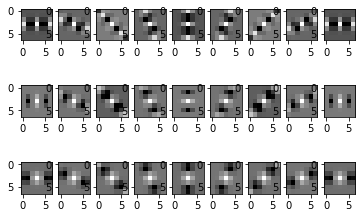

In [1529]:
filters = build_filters()
plt.figure()
plotf(filters)

In [1530]:
dcmPath = "./dcms/test/00000322.dcm"
x = dcm2npMatrix(dcmPath)
normalX = np.uint8((max_min_normal(x)))

using_max_min normal


In [3]:
tmp = cv2.medianBlur(normalX, 9)
tmp = cv2.GaussianBlur(tmp,(5,5),0).astype('uint8')
plt.figure()
plotImage(tmp)
#gkImg, imgs = process(cv2.medianBlur(tmp,13)-np.mean(cv2.medianBlur(tmp,9)), filters)
gkImg, imgs = process(tmp, filters)

NameError: name 'normalX' is not defined

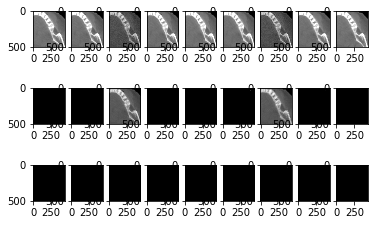

In [1532]:
plotfimg(imgs)

In [1533]:
npimgs =[np.array(x) for x in imgs]

In [1534]:
ims = np.stack(npimgs, axis=2)

using_max_min normal


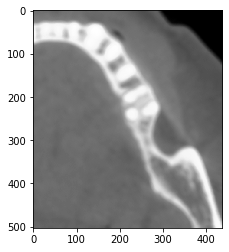

In [1535]:
plotImage(max_min_normal(np.mean(np.abs(ims), axis=2)))

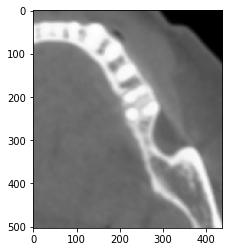

In [1536]:
meanImage = np.mean(ims, axis=2)
plotImage(meanImage)

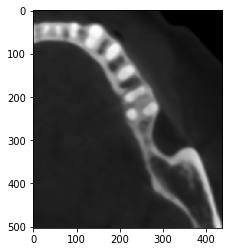

In [1537]:
varImage = np.var(ims, axis=2)
plotImage(varImg)

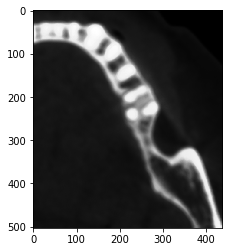

In [1539]:
plotImage(np.mean(np.abs(ims), axis=2) * np.var(ims, axis=2))

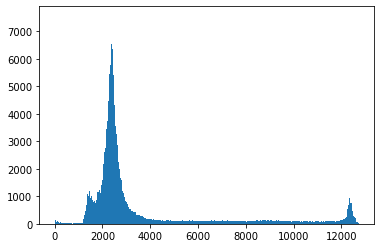

In [1540]:
plotHist(np.var(ims, axis=2))

using_max_min normal


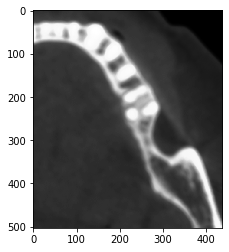

In [1541]:
plotImage(max_min_normal(np.var(ims, axis=2)))

using_max_min normal
Height:  503
Width:   438
Execution time: 0 minute(s) and 15 seconds
blocks: 86


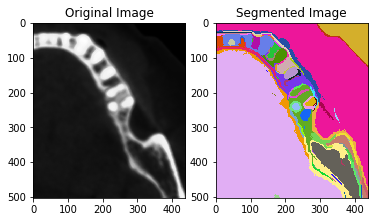

In [1542]:
imp.reload(gbseg)
u, out= gbseg.segment(max_min_normal(varImage * meanImage ), 120, 20)

using_max_min normal
Height:  503
Width:   438
Execution time: 0 minute(s) and 14 seconds
blocks: 249


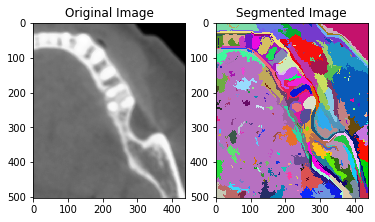

In [1543]:
u, out= gbseg.segment(max_min_normal(meanImage), 120, 20)

Height:  503
Width:   438
Execution time: 0 minute(s) and 16 seconds
blocks: 1790


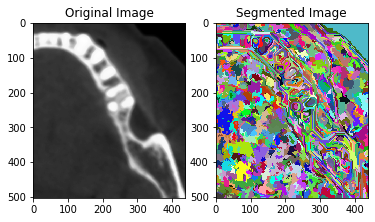

In [1544]:
imp.reload(gbseg)
u, out= gbseg.segment((varImage), 120, 20)

using_max_min normal
Height:  503
Width:   438
Execution time: 0 minute(s) and 13 seconds
blocks: 1458


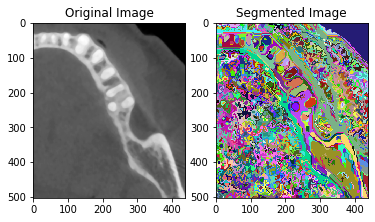

In [1103]:
imp.reload(gbseg)
u, out= gbseg.segment(max_min_normal(tmp), 50, 20)

Height:  503
Width:   438


/home/zhenxingxu/code/tc/gbseg.py:215: RuntimeWarning: overflow encountered in ubyte_scalars
  result = math.sqrt(square(img[y1, x1] - img[y2, x2]))
/home/zhenxingxu/code/tc/gbseg.py:201: RuntimeWarning: overflow encountered in ubyte_scalars
  return value * value


Execution time: 0 minute(s) and 15 seconds
blocks: 1784


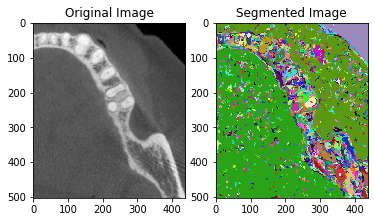

In [864]:
tmp = cv2.GaussianBlur(normalX,(5,5),0).astype('uint8')
u, out= gbseg.segment(tmp, 20, 20)

Height:  503
Width:   438
Execution time: 0 minute(s) and 14 seconds
blocks: 333


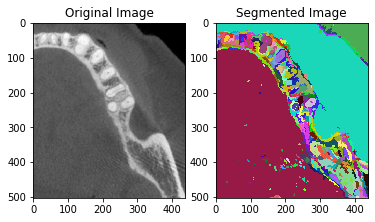

In [308]:
#tmp = cv2.medianBlur(normalX,5).astype('uint8')
u, out= gbseg.segment(tmp, 120, 20)

using_max_min normal


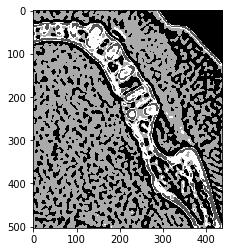

In [1299]:
model = KMeans(n_clusters=4, random_state=1).fit(max_min_normal(meanImage.reshape(-1,1)))
re = np.array(model.labels_)
sh = np.var(ims, axis=2).shape
re =re.reshape(sh[0],-1)
plt.figure()
plotImage(re)

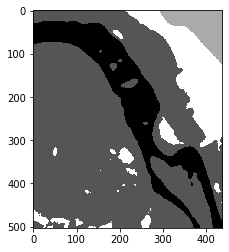

In [1524]:
model = KMeans(n_clusters=4, random_state=1).fit(np.var(ims, axis=2).reshape(-1,1))
re = np.array(model.labels_)
sh = np.var(ims, axis=2).shape
re =re.reshape(sh[0],-1)
plt.figure()
plotImage(re)

using_max_min normal


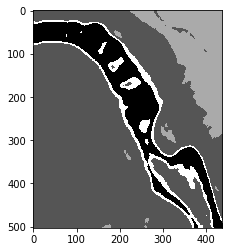

In [1523]:
model = KMeans(n_clusters=4, random_state=1).fit(max_min_normal((meanImage*varImage).reshape(-1,1)))
re = np.array(model.labels_)
sh = np.var(ims, axis=2).shape
re =re.reshape(sh[0],-1)
plt.figure()
plotImage(re)

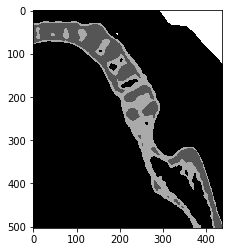

In [1189]:
model = KMeans(n_clusters=4, random_state=1).fit(tmp.reshape(-1,1))
re = np.array(model.labels_)
sh = np.var(ims, axis=2).shape
re =re.reshape(sh[0],-1)
plt.figure()
plotImage(re)

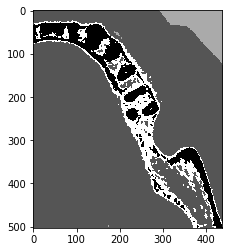

In [1190]:
model = KMeans(n_clusters=4, random_state=1).fit(normalX.reshape(-1,1))
re = np.array(model.labels_)
sh = np.var(ims, axis=2).shape
re =re.reshape(sh[0],-1)
plt.figure()
plotImage(re)

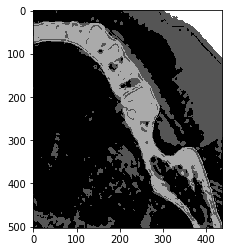

In [1080]:
im = np.var(ims, axis=2)
gMM = GaussianMixture(n_components=4, covariance_type='full')
gre = gMM.fit(im.reshape(-1,1))
gre =  gre.predict(im.reshape(-1,1))
gre =gre.reshape(sh[0],-1)
plotImage(gre)

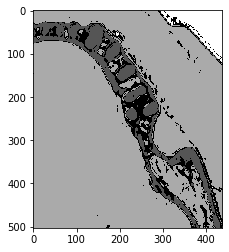

In [1191]:
im = meanImage
gMM = GaussianMixture(n_components=4, covariance_type='full')
gre = gMM.fit(im.reshape(-1,1))
gre =  gre.predict(im.reshape(-1,1))
gre =gre.reshape(sh[0],-1)
plotImage(gre)

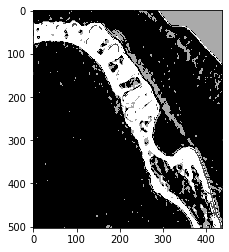

In [1192]:
im = varImage
gMM = GaussianMixture(n_components=4, covariance_type='full')
gre = gMM.fit(im.reshape(-1,1))
gre =  gre.predict(im.reshape(-1,1))
gre =gre.reshape(sh[0],-1)
plotImage(gre)

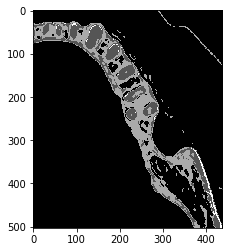

In [1193]:
im = meanImage * meanImage
gMM = GaussianMixture(n_components=4, covariance_type='full')
gre = gMM.fit(im.reshape(-1,1))
gre =  gre.predict(im.reshape(-1,1))
gre =gre.reshape(sh[0],-1)
plotImage(gre)

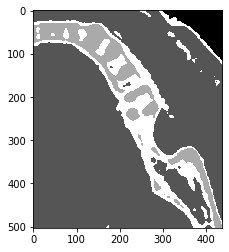

In [1082]:
im = tmp
gMM = GaussianMixture(n_components=4, covariance_type='full')
gre = gMM.fit(im.reshape(-1,1))
gre =  gre.predict(im.reshape(-1,1))
gre =gre.reshape(sh[0],-1)
plotImage(gre)

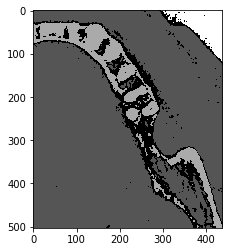

In [239]:
im = normalX
gMM = GaussianMixture(n_components=4, covariance_type='full')
gre = gMM.fit(im.reshape(-1,1))
gre =  gre.predict(im.reshape(-1,1))
gre =gre.reshape(sh[0],-1)
plotImage(gre)

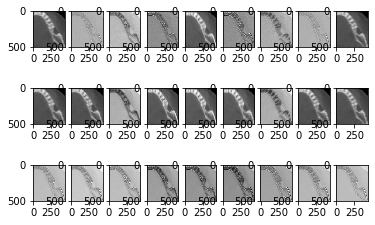

In [1760]:
plotfimg(imgs)

In [1775]:
plt.hist(gkImg.flatten(), bins=500)
plt.show()

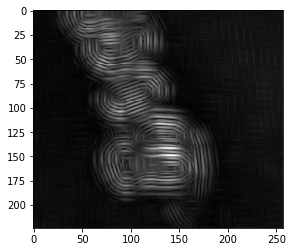

In [1253]:
plotImage(gkImg)

In [1909]:
sobel =  np.var(ims, axis=2)
sobelX = np.abs(cv2.Sobel(sobel, -1, 1, 0))
sobelY = np.abs(cv2.Sobel(sobel, -1, 0 ,1))

In [1910]:
plotImage(cv2.addWeighted(sobelX,0.5,sobelY,0.5,0))

using_max_min normal


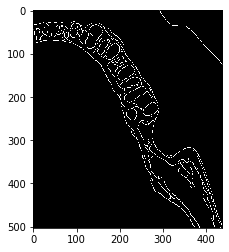

In [840]:
plotImage(cv2.Canny(np.uint8(max_min_normal(np.var(ims, axis=2))), 0,100))

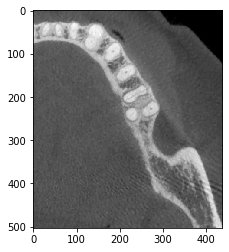

In [1827]:
plotImage(normalX)

using_max_min normal


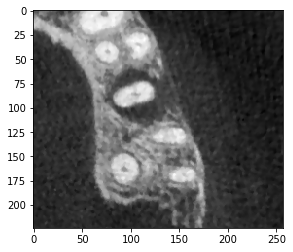

In [562]:
plotImage(np.uint8(max_min_normal(x)))

In [594]:
max_min(max_min_normal(x))

using_max_min normal
Max:255.0. Min:0.0


In [595]:
gkImg = max_min_normal(gkImg)
gkImg = np.uint8(gkImg)

using_max_min normal


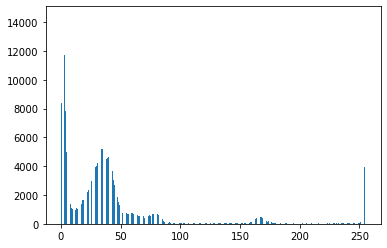

In [596]:
plt.hist(gkImg.flatten(), bins=500)
plt.show()

In [780]:
plotf(filters)

/home/zhenxingxu/miniconda3/envs/image/lib/python3.6/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


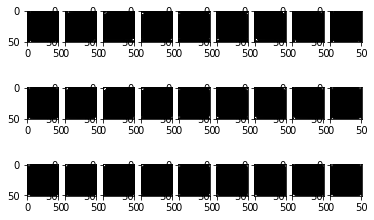

In [661]:
plotffft(filters)

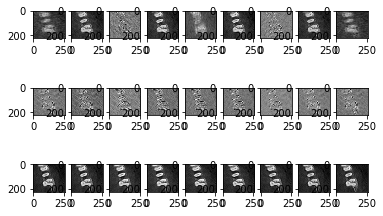

In [1499]:
plotfimg(imgs)

In [791]:
filters[0]

array([[ 1.80485139e-35,  1.21667198e-35, -6.67615951e-35, ...,
        -6.67615951e-35,  1.21667198e-35,  1.80485139e-35],
       [ 2.01924358e-32,  1.36119633e-32, -7.46919792e-32, ...,
        -7.46919792e-32,  1.36119633e-32,  2.01924358e-32],
       [ 1.57612247e-29,  1.06248307e-29, -5.83008944e-29, ...,
        -5.83008944e-29,  1.06248307e-29,  1.57612247e-29],
       ...,
       [ 1.57612247e-29,  1.06248307e-29, -5.83008944e-29, ...,
        -5.83008944e-29,  1.06248307e-29,  1.57612247e-29],
       [ 2.01924358e-32,  1.36119633e-32, -7.46919792e-32, ...,
        -7.46919792e-32,  1.36119633e-32,  2.01924358e-32],
       [ 1.80485139e-35,  1.21667198e-35, -6.67615951e-35, ...,
        -6.67615951e-35,  1.21667198e-35,  1.80485139e-35]])

In [142]:
imgs[3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [116]:
%matplotlib 

Using matplotlib backend: Qt5Agg


In [1776]:
%matplotlib inline

In [369]:
plotImage(x+x+x+x)

In [60]:
diff

NameError: name 'diff' is not defined

In [ ]:
# --------------------------------------------------------------------------------
# Segment an image:
# Returns a color image representing the segmentation.
#
# Inputs:
#           in_image: image to segment.
#           sigma: to smooth the image.
#           k: constant for threshold function.
#           min_size: minimum component size (enforced by post-processing stage).
#
# Returns:
#           num_ccs: number of connected components in the segmentation.
# --------------------------------------------------------------------------------
def segment(in_image, k, min_size):
    start_time = time.time()
    height, width, band = in_image.shape
    print("Height:  " + str(height))
    print("Width:   " + str(width))
    smooth_red_band = smooth(in_image[:, :, 0], sigma)
    smooth_green_band = smooth(in_image[:, :, 1], sigma)
    smooth_blue_band = smooth(in_image[:, :, 2], sigma)

    # build graph
    edges_size = width * height * 4
    edges = np.zeros(shape=(edges_size, 3), dtype=object)
    num = 0
    for y in range(height):
        for x in range(width):
            if x < width - 1:
                edges[num, 0] = int(y * width + x)
                edges[num, 1] = int(y * width + (x + 1))
                edges[num, 2] = diff(smooth_red_band, smooth_green_band, smooth_blue_band, x, y, x + 1, y)
                num += 1
            if y < height - 1:
                edges[num, 0] = int(y * width + x)
                edges[num, 1] = int((y + 1) * width + x)
                edges[num, 2] = diff(smooth_red_band, smooth_green_band, smooth_blue_band, x, y, x, y + 1)
                num += 1

            if (x < width - 1) and (y < height - 2):
                edges[num, 0] = int(y * width + x)
                edges[num, 1] = int((y + 1) * width + (x + 1))
                edges[num, 2] = diff(smooth_red_band, smooth_green_band, smooth_blue_band, x, y, x + 1, y + 1)
                num += 1

            if (x < width - 1) and (y > 0):
                edges[num, 0] = int(y * width + x)
                edges[num, 1] = int((y - 1) * width + (x + 1))
                edges[num, 2] = diff(smooth_red_band, smooth_green_band, smooth_blue_band, x, y, x + 1, y - 1)
                num += 1
    # Segment
    u = segment_graph(width * height, num, edges, k)

    # post process small components
    for i in range(num):
        a = u.find(edges[i, 0])
        b = u.find(edges[i, 1])
        if (a != b) and ((u.size(a) < min_size) or (u.size(b) < min_size)):
            u.join(a, b)

    num_cc = u.num_sets()
    output = np.zeros(shape=(height, width, 3))

    # pick random colors for each component
    colors = np.zeros(shape=(height * width, 3))
    for i in range(height * width):
        colors[i, :] = random_rgb()

    for y in range(height):
        for x in range(width):
            comp = u.find(y * width + x)
            output[y, x, :] = colors[comp, :]

    elapsed_time = time.time() - start_time
    print(
        "Execution time: " + str(int(elapsed_time / 60)) + " minute(s) and " + str(
            int(elapsed_time % 60)) + " seconds")

    # displaying the result
    fig = plt.figure()
    a = fig.add_subplot(1, 2, 1)
    plt.imshow(in_image)
    a.set_title('Original Image')
    a = fig.add_subplot(1, 2, 2)
    plt.imshow(output)
    a.set_title('Segmented Image')
    plt.show()

In [ ]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray
input_path = "paris.jpg"

# Loading the image
input_image = matplotlib.pyplot.imread(input_path)
input_image = rgb2gray(input_image)
print("Loading is done.")
print("processing...")
gbseg.segment(input_image, 500, 50)